In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [12]:
data=pd.read_csv('RTA Dataset.csv')

In [13]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [15]:
data['Accident_severity'].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [16]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [17]:
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
data.rename(columns=col_map,inplace=True)

In [18]:
data['time'] = pd.to_datetime(data['time'])

In [19]:
data.head()

,time,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity
0,2022-06-21 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,2022-06-21 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,2022-06-21 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2022-06-21 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2022-06-21 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [20]:
data.isna().sum()

time                          0
day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident

In [21]:
data['hour'] = data['time'].dt.hour
data['minute'] = data['time'].dt.minute
data.drop('time', axis=1, inplace=True)

In [22]:
data.head()

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17,2
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17,2
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17,2
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,6
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1,6


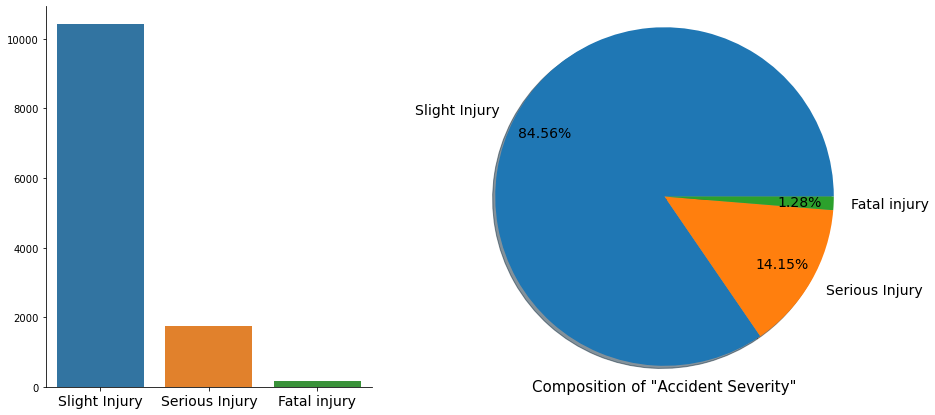

In [23]:
plt.figure(figsize=(14,7))
ax1=plt.subplot(1,2,1)
sns.countplot(data=data, x="accident_severity")
ax1.set_xlabel('')
ax1.set_ylabel('')
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
sns.despine(top=True,right=True)

ax2=plt.subplot(1,2,2)
plt.pie(data['accident_severity'].value_counts(),
        labels=list(data["accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

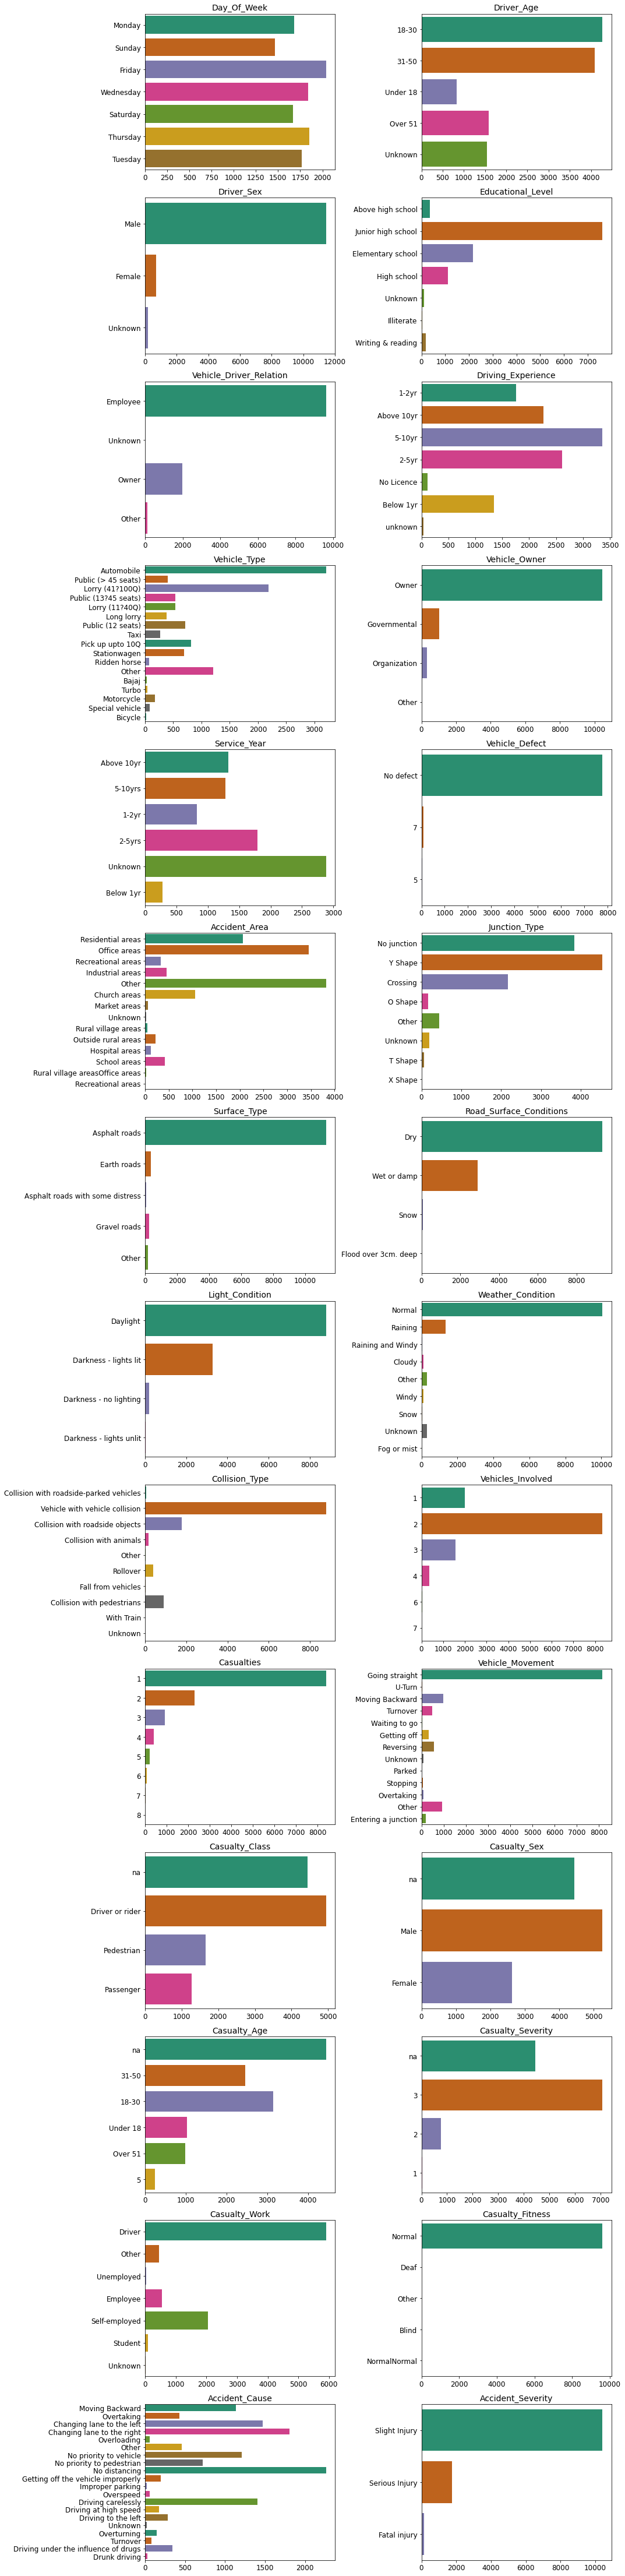

In [24]:
plt.figure(figsize=(15,70))
plotno=1
for col in data.drop(['hour', 'minute', 'lanes', 'road_allignment', 'pedestrian_movement'],axis=1):
    if plotno<=data.shape[1]:
        ax1=plt.subplot(16,2,plotno)
        sns.countplot(data=data,y=col,palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotno+=1
plt.tight_layout()
        

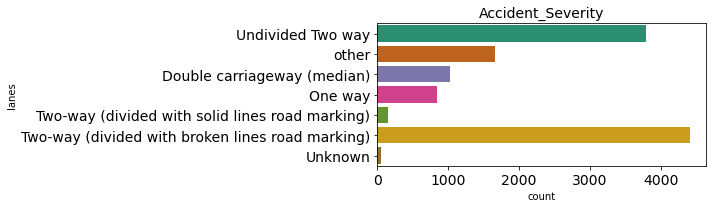

In [25]:
plt.figure(figsize=(10,3))
sns.countplot(data=data,y='lanes',palette='Dark2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(col.title(), fontsize=14)
plt.tight_layout()

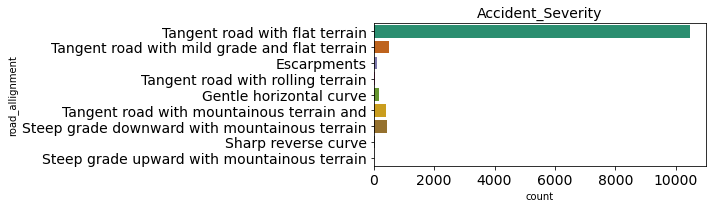

In [26]:
plt.figure(figsize=(10,3))
sns.countplot(data=data,y='road_allignment',palette='Dark2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(col.title(), fontsize=14)
plt.tight_layout()

<ipython-input-27-4d14818ecc01>:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


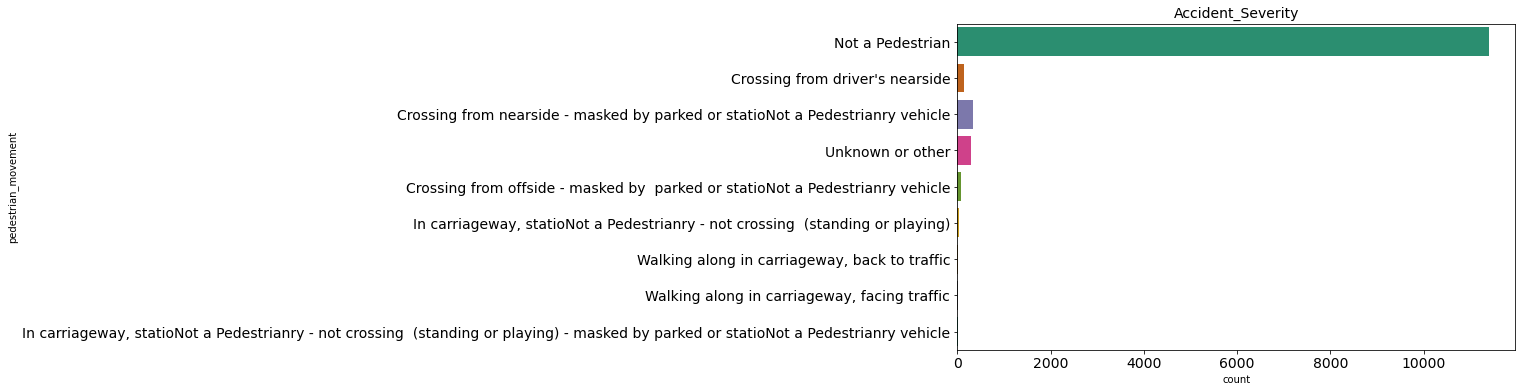

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,y='pedestrian_movement',palette='Dark2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(col.title(), fontsize=14)
plt.tight_layout()

In [28]:
data.isnull().sum()

day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident_severity             0
hour    

In [29]:
data.drop(columns = ['vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness',], inplace=True)

In [30]:
impute_cols=[x for x in data.isna().sum()[data.isna().sum()!=0].index.tolist()]
for feat in impute_cols:
    data[feat].fillna(data[feat].mode()[0], inplace=True)

In [32]:
data

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,Monday,18-30,Male,Above high school,1-2yr,Automobile,Owner,Above 10yr,Residential areas,Two-way (divided with broken lines road marking),...,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury,17,2
1,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Owner,5-10yrs,Office areas,Undivided Two way,...,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,17,2
2,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Owner,Unknown,Recreational areas,other,...,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17,2
3,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Governmental,Unknown,Office areas,other,...,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1,6
4,Sunday,18-30,Male,Junior high school,2-5yr,Automobile,Owner,5-10yrs,Industrial areas,other,...,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,Junior high school,2-5yr,Lorry (11?40Q),Owner,Unknown,Outside rural areas,Undivided Two way,...,Going straight,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury,16,15
12312,Sunday,Unknown,Male,Elementary school,5-10yr,Automobile,Owner,Unknown,Outside rural areas,Two-way (divided with broken lines road marking),...,Other,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury,18,0
12313,Sunday,Over 51,Male,Junior high school,5-10yr,Bajaj,Owner,2-5yrs,Outside rural areas,Two-way (divided with broken lines road marking),...,Other,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury,13,55
12314,Sunday,18-30,Female,Junior high school,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,Office areas,Undivided Two way,...,Other,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13,55


In [33]:
data.nunique()

day_of_week                 7
driver_age                  5
driver_sex                  3
educational_level           7
driving_experience          7
vehicle_type               17
vehicle_owner               4
service_year                6
accident_area              14
lanes                       7
road_allignment             9
junction_type               8
surface_type                5
road_surface_conditions     4
light_condition             4
weather_condition           9
collision_type             10
vehicles_involved           6
casualties                  8
vehicle_movement           13
casualty_class              4
casualty_sex                3
casualty_age                6
casualty_severity           4
pedestrian_movement         9
accident_cause             20
accident_severity           3
hour                       24
minute                     60
dtype: int64

In [34]:
data_feat=data.drop(['accident_severity'],axis=1)

In [35]:

ordinalencoder_X = OrdinalEncoder()
data_encoded= ordinalencoder_X.fit_transform(data_feat)

In [36]:
cols=list(data.columns)
cols.remove('accident_severity')
cols

['day_of_week',
 'driver_age',
 'driver_sex',
 'educational_level',
 'driving_experience',
 'vehicle_type',
 'vehicle_owner',
 'service_year',
 'accident_area',
 'lanes',
 'road_allignment',
 'junction_type',
 'surface_type',
 'road_surface_conditions',
 'light_condition',
 'weather_condition',
 'collision_type',
 'vehicles_involved',
 'casualties',
 'vehicle_movement',
 'casualty_class',
 'casualty_sex',
 'casualty_age',
 'casualty_severity',
 'pedestrian_movement',
 'accident_cause',
 'hour',
 'minute']

In [37]:
encoded_data = pd.DataFrame(data_encoded[:],columns=cols)

In [38]:
encoded_data

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,...,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,hour,minute
0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,9.0,2.0,...,1.0,2.0,3.0,2.0,5.0,3.0,5.0,9.0,17.0,2.0
1,1.0,1.0,1.0,4.0,3.0,11.0,3.0,2.0,6.0,4.0,...,1.0,2.0,3.0,2.0,5.0,3.0,5.0,16.0,17.0,2.0
2,1.0,0.0,1.0,4.0,0.0,5.0,3.0,5.0,1.0,6.0,...,1.0,2.0,0.0,1.0,1.0,2.0,5.0,0.0,17.0,2.0
3,3.0,0.0,1.0,4.0,2.0,11.0,0.0,5.0,6.0,6.0,...,1.0,2.0,2.0,0.0,0.0,2.0,5.0,1.0,1.0,6.0
4,3.0,0.0,1.0,4.0,1.0,0.0,3.0,2.0,4.0,6.0,...,1.0,2.0,3.0,2.0,5.0,3.0,5.0,16.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,6.0,1.0,1.0,4.0,1.0,4.0,3.0,5.0,5.0,4.0,...,0.0,2.0,3.0,2.0,5.0,3.0,5.0,10.0,16.0,15.0
12312,3.0,4.0,1.0,1.0,2.0,0.0,3.0,5.0,5.0,2.0,...,0.0,4.0,3.0,2.0,5.0,3.0,5.0,10.0,18.0,0.0
12313,3.0,2.0,1.0,4.0,2.0,1.0,3.0,1.0,5.0,2.0,...,0.0,4.0,0.0,1.0,1.0,2.0,5.0,1.0,13.0,55.0
12314,3.0,0.0,0.0,4.0,3.0,5.0,3.0,1.0,6.0,4.0,...,0.0,4.0,3.0,2.0,5.0,3.0,5.0,5.0,13.0,55.0


In [39]:
encoded_data['accident_severity']= data['accident_severity']

In [40]:
encoded_data

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,hour,minute,accident_severity
0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,9.0,2.0,...,2.0,3.0,2.0,5.0,3.0,5.0,9.0,17.0,2.0,Slight Injury
1,1.0,1.0,1.0,4.0,3.0,11.0,3.0,2.0,6.0,4.0,...,2.0,3.0,2.0,5.0,3.0,5.0,16.0,17.0,2.0,Slight Injury
2,1.0,0.0,1.0,4.0,0.0,5.0,3.0,5.0,1.0,6.0,...,2.0,0.0,1.0,1.0,2.0,5.0,0.0,17.0,2.0,Serious Injury
3,3.0,0.0,1.0,4.0,2.0,11.0,0.0,5.0,6.0,6.0,...,2.0,2.0,0.0,0.0,2.0,5.0,1.0,1.0,6.0,Slight Injury
4,3.0,0.0,1.0,4.0,1.0,0.0,3.0,2.0,4.0,6.0,...,2.0,3.0,2.0,5.0,3.0,5.0,16.0,1.0,6.0,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,6.0,1.0,1.0,4.0,1.0,4.0,3.0,5.0,5.0,4.0,...,2.0,3.0,2.0,5.0,3.0,5.0,10.0,16.0,15.0,Slight Injury
12312,3.0,4.0,1.0,1.0,2.0,0.0,3.0,5.0,5.0,2.0,...,4.0,3.0,2.0,5.0,3.0,5.0,10.0,18.0,0.0,Slight Injury
12313,3.0,2.0,1.0,4.0,2.0,1.0,3.0,1.0,5.0,2.0,...,4.0,0.0,1.0,1.0,2.0,5.0,1.0,13.0,55.0,Serious Injury
12314,3.0,0.0,0.0,4.0,3.0,5.0,3.0,1.0,6.0,4.0,...,4.0,3.0,2.0,5.0,3.0,5.0,5.0,13.0,55.0,Slight Injury


<AxesSubplot:>

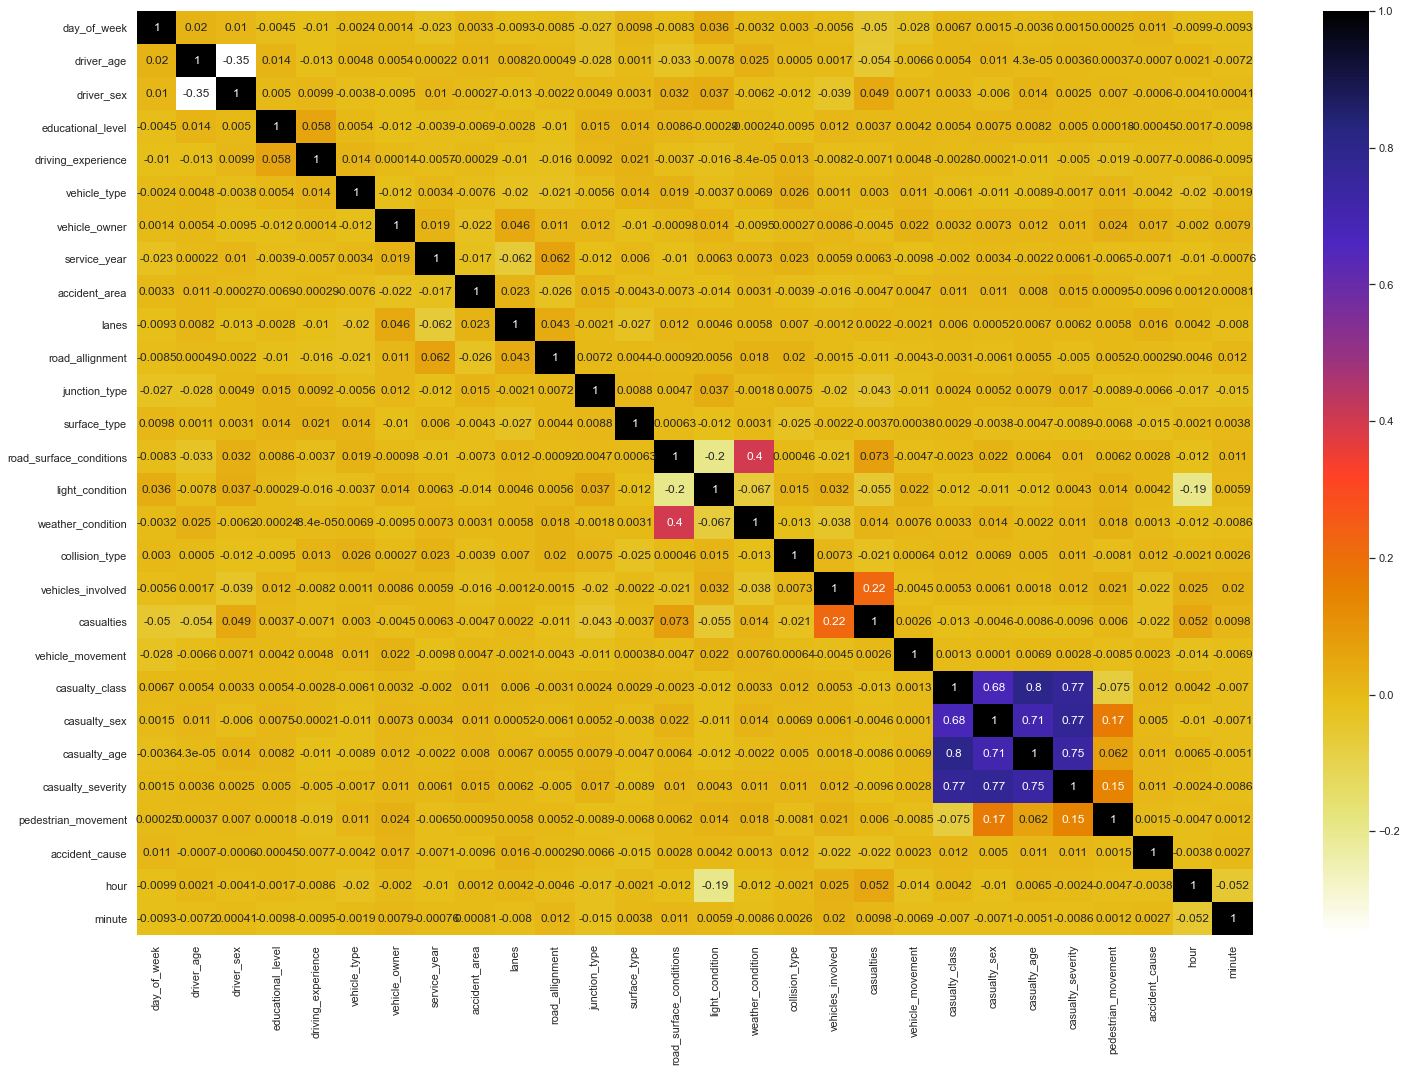

In [41]:
plt.figure(figsize=(25,17))
sns.set(font_scale=1)
sns.heatmap(encoded_data.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [44]:

X = encoded_data.drop('accident_severity', axis=1)
y = encoded_data['accident_severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [45]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [46]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LOG', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVC', SVC()))

In [47]:
names = []
results = []
for name, model in models:
    fold = KFold(n_splits=10)
    score = cross_val_score(model, X, y, cv=fold, scoring='accuracy')
    names.append(name)
    results.append(score)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [48]:

plotdict = dict(zip(names, results))

for k,v in plotdict.items():
    print(f"{k}: {round(v.mean(),5)}")

KNN: 0.82697
LOG: 0.84548
DTC: 0.72726
RFC: 0.84759
SVC: 0.84564


In [50]:
model = RandomForestClassifier()


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [52]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_pred = model.predict(X_test)


In [54]:
score = accuracy_score(y_test, y_pred)
print("Accuracy: ", score)

Accuracy:  0.8397834912043302


In [57]:
import joblib
joblib.dump(model,'RandomForestClassifier.pkl')

['RandomForestClassifier.pkl']

In [58]:
df_importance = pd.DataFrame()
df_importance['Features'] = X.columns
df_importance['Importance'] = model.feature_importances_

In [59]:
top10 = list(df_importance.sort_values("Importance", ascending=False)['Features'].head(10).values)
top10

['minute',
 'hour',
 'accident_cause',
 'vehicle_type',
 'day_of_week',
 'accident_area',
 'driving_experience',
 'vehicles_involved',
 'lanes',
 'vehicle_movement']

In [60]:
df_top10 = encoded_data[top10]
df_top10

,minute,hour,accident_cause,vehicle_type,day_of_week,accident_area,driving_experience,vehicles_involved,lanes,vehicle_movement
0,2.0,17.0,9.0,0.0,1.0,9.0,0.0,1.0,2.0,2.0
1,2.0,17.0,16.0,11.0,1.0,6.0,3.0,1.0,4.0,2.0
2,2.0,17.0,0.0,5.0,1.0,1.0,0.0,1.0,6.0,2.0
3,6.0,1.0,1.0,11.0,3.0,6.0,2.0,1.0,6.0,2.0
4,6.0,1.0,16.0,0.0,3.0,4.0,1.0,1.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...
12311,15.0,16.0,10.0,4.0,6.0,5.0,1.0,1.0,4.0,2.0
12312,0.0,18.0,10.0,0.0,3.0,5.0,2.0,1.0,2.0,4.0
12313,55.0,13.0,1.0,1.0,3.0,5.0,2.0,0.0,2.0,4.0
12314,55.0,13.0,5.0,5.0,3.0,6.0,3.0,1.0,4.0,4.0


In [61]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_top10, y, test_size=0.3, random_state=42)
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

(8621, 10) (3695, 10) (8621,) (3695,)


In [62]:
model.fit(X_train_new, y_train_new)

RandomForestClassifier()

In [63]:
y_pred_new = model.predict(X_test_new)
score_new = accuracy_score(y_test_new, y_pred_new)
print("Accuracy: ", score_new)

Accuracy:  0.835723951285521
